In [ ]:
# Import required packages
import time
from typing import Any
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
from paik.solver import Solver
from paik.settings import (
    PANDA_NSF,
    PANDA_PAIK,
    FETCH_PAIK,
    FETCH_ARM_PAIK,
    IIWA7_PAIK,
)

In [ ]:
solver_param = IIWA7_PAIK
solver_param.workdir = "/home/luca/paik"
# solver = Solver(solver_param=solver_param)

In [ ]:
solver_param

In [ ]:
from paik.model import get_robot

In [ ]:
robot = get_robot(solver_param.robot_name, solver_param.dir_paths)

In [ ]:
robot.n_dofs

In [ ]:
import matplotlib.pyplot as plt
import matplotx
import numpy as np

In [ ]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes

width = 1
ticks =np.linspace(0, width, 11)

ax.set_xlabel("$\\theta_{1}$")
ax.set_ylabel("$\\theta_{2}$")

plt.xticks(ticks, labels=[i for i in range(len(ticks))])
plt.yticks(ticks, labels=[i for i in range(len(ticks))])

# xtickslabls = ["" for i in range(4)] + ["$\\theta^{max}_{1}$", ""]
# # Set ticks labels for x-axis
# ax.set_xticklabels(xtickslabls)




for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n != 1 and n != 9:
        label.set_visible(False)

for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if n != 1 and n != 9:
        label.set_visible(False)
        

min_line_num = 1
max_line_num = 8
buffer_width = .5
nbins = 10

lower_bound = (min_line_num-buffer_width)/nbins * width
upper_bound = (max_line_num+buffer_width)/nbins * width
min_line = min_line_num/nbins * width
max_line = max_line_num/nbins * width

print(lower_bound, upper_bound, min_line, max_line)
# line axvline is dashed
plt.axvline(
    x=max_line, ymin=lower_bound, ymax=upper_bound, color="black", linestyle="--", label="theta_1 max"
)

# line axvline is dashed
plt.axvline(
    x=min_line, ymin=lower_bound, ymax=upper_bound, color="black", linestyle="--", label="theta_1 min"
)

# line colour is white
plt.axhline(y=max_line, xmin=lower_bound, xmax=upper_bound, color="black", linestyle="--", label="theta_2 max")

plt.axhline(y=min_line, xmin=lower_bound, xmax=upper_bound, color="black", linestyle="--", label="theta_2 max")


ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# make arrows
# ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
#         transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
#         transform=ax.get_xaxis_transform(), clip_on=False)
# place legend outside
# plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the limits for the plot
theta1_min, theta1_max = 0, 10
theta2_min, theta2_max = 0, 5

# Create a figure and axis
fig, ax = plt.subplots()

# Set the limits of the plot
ax.set_xlim(theta1_min, theta1_max)
ax.set_ylim(theta2_min, theta2_max)

# Set the labels for the axes
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')

# Draw the grid lines
ax.grid(True, which='both')

# Draw horizontal and vertical lines (grid-like appearance)
for y in np.linspace(theta2_min, theta2_max, 100):
    ax.axhline(y, color='gray', linewidth=0.5, linestyle='--', alpha=0.5)
for x in np.linspace(theta1_min, theta1_max, 100):
    ax.axvline(x, color='gray', linewidth=0.5, linestyle='--', alpha=0.5)

# Example coordinates for the irregular polygons
polygon1 = np.array([[1, 2], [2, 3], [3, 2.5], [2.5, 1.5], [1.5, 1]])
polygon2 = np.array([[6, 3], [7, 4], [8, 3.5], [7.5, 2.5], [6.5, 2]])
polygon3 = np.array([[4, 1], [5, 2], [6, 1.5], [5.5, 0.5], [4.5, 0]])

# Draw the polygons
ax.plot(polygon1[:, 0], polygon1[:, 1], 'ko-')  # Black circles connected by lines
ax.plot(polygon2[:, 0], polygon2[:, 1], 'ko-')
ax.plot(polygon3[:, 0], polygon3[:, 1], 'ko-')

# Draw filled areas (for illustration, using one filled area)
polygon_fill = np.array([[4, 2], [5, 3], [6, 2.5], [5.5, 1.5], [4.5, 1]])
ax.fill(polygon_fill[:, 0], polygon_fill[:, 1], 'gray', alpha=0.5)

# Set the major ticks
ax.set_xticks(np.arange(theta1_min, theta1_max + 1, 1))
ax.set_yticks(np.arange(theta2_min, theta2_max + 1, 1))

# Set the minor ticks
ax.set_xticks(np.arange(theta1_min, theta1_max + 1, 0.2), minor=True)
ax.set_yticks(np.arange(theta2_min, theta2_max + 1, 0.2), minor=True)


# Adding arrow labels to the ends of the axes
ax.annotate(r'$\theta_1$', xy=(theta1_max, theta2_min), xytext=(theta1_max + 0.5, theta2_min - 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, ha='center')
ax.annotate(r'$\theta_2$', xy=(theta1_min, theta2_max), xytext=(theta1_min - 0.5, theta2_max + 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, ha='center')

# Display the plot
plt.show()


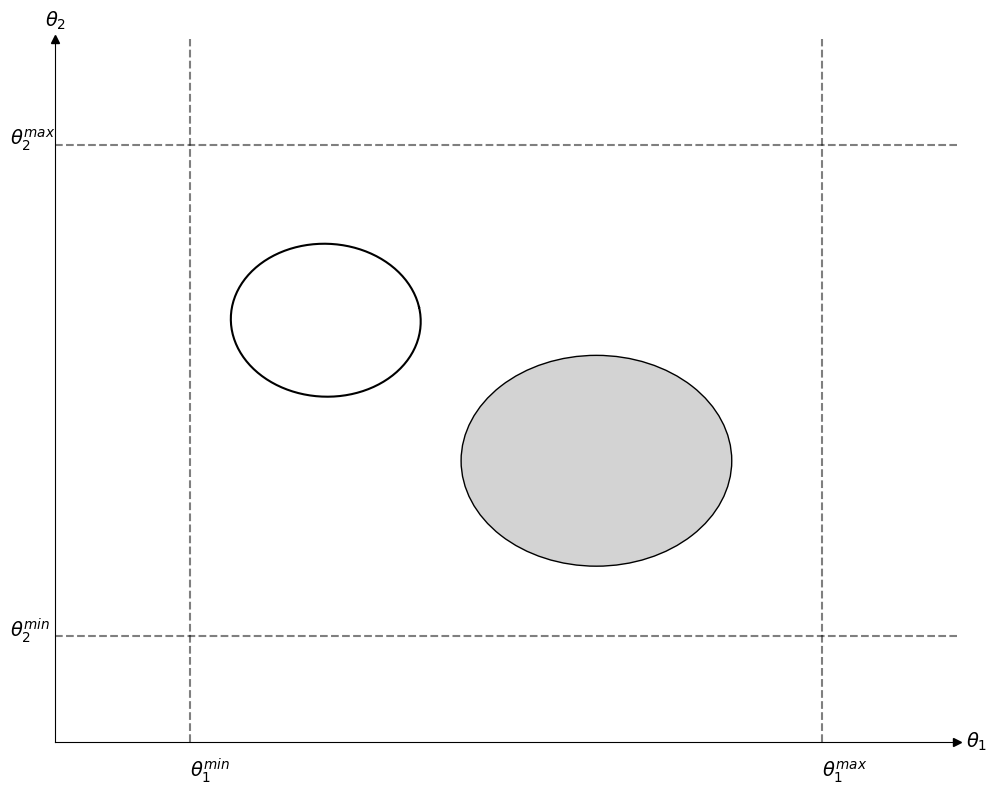

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

theta_min = 1.5
theta_max = 8.5
font_size = 14

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Set axis labels and limits
# ax.set_xlabel(r'$\theta_1$', fontsize=14)
# ax.set_ylabel(r'$\theta_2$', fontsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Remove tick marks and labels
ax.set_xticks([])
ax.set_yticks([])

# Add min and max labels
ax.text(theta_min, -0.5, r'$\theta_1^{min}$', fontsize=font_size)
ax.text(theta_max, -0.5, r'$\theta_1^{max}$', fontsize=font_size)
ax.text(-0.5, theta_min, r'$\theta_2^{min}$', fontsize=font_size)
ax.text(-0.5, theta_max, r'$\theta_2^{max}$', fontsize=font_size)

# Draw the main curve
t = np.linspace(0, 2*np.pi, 200)
x = 3 + 1*np.cos(t) - .2*np.sin(t-.17) 
y = 6 + 1*np.sin(t) + .2*np.cos(t-.37) 
ax.plot(x, y, 'k-')

# Draw the shaded circle
circle = plt.Circle((6, 4), 1.5, fill=True, facecolor='lightgray', edgecolor='black')
ax.add_artist(circle)

ax.axvline(x=theta_min, color='k', linestyle='--', alpha=0.5)
ax.axvline(x=theta_max, color='k', linestyle='--', alpha=0.5)

ax.axhline(y=theta_min, color='k', linestyle='--', alpha=0.5)
ax.axhline(y=theta_max, color='k', linestyle='--', alpha=0.5)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)  
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Extend axis lines
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

# Add axis labels at the ends
ax.text(10.1, 0, r'$\theta_1$', fontsize=font_size, ha='left', va='center')
ax.text(0, 10.1, r'$\theta_2$', fontsize=font_size, ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()